<h1>Text Sentiment Analysis for Twitter Posts</h1>

Objective:
- Find out the different sentiment levels (negative, neutral, positive) among the posts and generate word clouds to discover key motivations / beliefs driving the sentiments

In [1]:
# pip install vaderSentiment

In [2]:
# pip install boto3

In [3]:
# pip install seaborn --upgrade

In [4]:
import pandas as pd
import numpy as np
import os
import re
import plotly.express as px
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.style as style
import matplotlib
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jlrqq/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
analyser = SentimentIntensityAnalyzer()

In [6]:
# https://github.com/cjhutto/vaderSentiment#about-the-scoring
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [7]:
# Read Twitter Data from Local CSV

tweets = pd.read_csv('../Twitter_Data/Twitter_May_Nov_5000.csv', index_col=0)

print(tweets.shape)
tweets.head()

(5001, 5)


,Tweet Id,Text,Username,Coordinates,Place
Datetime,,,,,
2020-11-29 23:59:40+00:00,1333198979224399873,@nspector4 @keithbaldrey France initiated dras...,Teelin,NaN,NaN
2020-11-29 23:58:54+00:00,1333198786475286528,@ClareCraigPath Drosten paper @WHO relied on t...,mdfdvntrs,NaN,NaN
2020-11-29 23:57:50+00:00,1333198514453671937,@Amelia28938902 Drosten paper @WHO relied on t...,mdfdvntrs,NaN,NaN
2020-11-29 23:57:28+00:00,1333198421692395521,@SJL99 @BorisJohnson @MattHancock Drosten pape...,mdfdvntrs,NaN,NaN
2020-11-29 23:56:54+00:00,1333198282592546818,@VeganaHedgehog @TheSun @Telegraph @DailyMailU...,mdfdvntrs,NaN,NaN


In [8]:
# Read Twitter Data from S3 

# import pandas as pd
# import boto3
# import io

# AWS_ACCESS_KEY_ID = "*"
# AWS_SECRET_ACCESS_KEY = "*"
# bucket = "is434-last-sem-best-sem"
# file_name = "data-lake/tweeter_data.csv"

# # Create connection to S3 and all buckets within S3
# s3 = boto3.client(
#     's3',
#     aws_access_key_id=AWS_ACCESS_KEY_ID,
#     aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
# )

# # Get object and file (key) from bucket
# obj = s3.get_object(Bucket= bucket, Key= file_name) 

# tweets = pd.read_csv(io.BytesIO(obj['Body'].read()))
# tweets

In [9]:
# Extract Text from DataFrame into a List

tweet_text_list = tweets['Text'].tolist()
tweet_text_list

['@nspector4 @keithbaldrey France initiated drastic lockdown at the end of October.\n(People still went to work btw. Lockdown means very different things in different jurisdictions.)\nYou may note that their #covid19 cases continued to rise considerably for quite some time after lockdown was declared Oct 29. https://t.co/Bax0DfUgmR',
 "@ClareCraigPath Drosten paper @WHO relied on to justify use of #PCRtest for #SARSCoV2 was NOT peer reviewed and 'test-protocol is useless with regards to ... an ongoing pandemic' https://t.co/ttWts6kra6 #Covid19 #Covid19UK #coronavirus #lockdown #lockdown2 #lockdown3 #tier3 #Covidiots #PCRtest",
 "@Amelia28938902 Drosten paper @WHO relied on to justify use of #PCRtest for #SARSCoV2 was NOT peer reviewed and 'test-protocol is useless with regards to ... an ongoing pandemic' https://t.co/ttWts6kra6 #Covid19 #Covid19UK #coronavirus #lockdown #lockdown2 #lockdown3 #tier3 #Covidiots #PCRtest",
 "@SJL99 @BorisJohnson @MattHancock Drosten paper @WHO relied on t

In [10]:
# Clean Text Function

def clean_tweet(comments):

    test_sentences = sent_tokenize(comments)
    test_sentences

    tokenizer = RegexpTokenizer(r'\w+')
    test_words = tokenizer.tokenize(comments)
    test_words

    stop_words = stopwords.words('english')
    # print(stop_words)

    filtered_test_words = []

    for w in test_words:
        if w not in stop_words:
            filtered_test_words.append(w)

    porter_stemer = PorterStemmer()

    stemed_filter_test_words = []
    for i in filtered_test_words:
        stemed_filter_test_words.append(porter_stemer.stem(i))

    join_words = " ".join([x for x in stemed_filter_test_words])

    return join_words

In [11]:
# Extract processed text

processed_text = [clean_tweet(tw) for tw in tweet_text_list]
processed_text

['nspector4 keithbaldrey franc initi drastic lockdown end octob peopl still went work btw lockdown mean differ thing differ jurisdict you may note covid19 case continu rise consider quit time lockdown declar oct 29 http co bax0dfugmr',
 'clarecraigpath drosten paper who reli justifi use pcrtest sarscov2 not peer review test protocol useless regard ongo pandem http co ttwts6kra6 covid19 covid19uk coronaviru lockdown lockdown2 lockdown3 tier3 covidiot pcrtest',
 'amelia28938902 drosten paper who reli justifi use pcrtest sarscov2 not peer review test protocol useless regard ongo pandem http co ttwts6kra6 covid19 covid19uk coronaviru lockdown lockdown2 lockdown3 tier3 covidiot pcrtest',
 'sjl99 borisjohnson matthancock drosten paper who reli justifi use pcrtest sarscov2 not peer review test protocol useless regard ongo pandem http co ttwts6kra6 covid19 covid19uk coronaviru lockdown lockdown2 lockdown3 tier3 covidiot pcrtest',
 'veganahedgehog thesun telegraph dailymailuk thetim guardian sp

In [12]:
# Add processed text into the DataFrame

tweets['processed_text'] = processed_text

In [13]:
# Extract processed tweets column

tweets_list = tweets['processed_text'].tolist()
tweets_list[:10]

['nspector4 keithbaldrey franc initi drastic lockdown end octob peopl still went work btw lockdown mean differ thing differ jurisdict you may note covid19 case continu rise consider quit time lockdown declar oct 29 http co bax0dfugmr',
 'clarecraigpath drosten paper who reli justifi use pcrtest sarscov2 not peer review test protocol useless regard ongo pandem http co ttwts6kra6 covid19 covid19uk coronaviru lockdown lockdown2 lockdown3 tier3 covidiot pcrtest',
 'amelia28938902 drosten paper who reli justifi use pcrtest sarscov2 not peer review test protocol useless regard ongo pandem http co ttwts6kra6 covid19 covid19uk coronaviru lockdown lockdown2 lockdown3 tier3 covidiot pcrtest',
 'sjl99 borisjohnson matthancock drosten paper who reli justifi use pcrtest sarscov2 not peer review test protocol useless regard ongo pandem http co ttwts6kra6 covid19 covid19uk coronaviru lockdown lockdown2 lockdown3 tier3 covidiot pcrtest',
 'veganahedgehog thesun telegraph dailymailuk thetim guardian sp

In [14]:
# Get a list of sentiment scores for tweets

sentiment_score_list = []
for sentence in tweets_list:
    sentiment_score = sentiment_analyzer_score(str(sentence))
    sentiment_score_list.append(sentiment_score)

sentiment_score_list[:10]

[0.0, -0.4215, -0.4215, -0.4215, -0.4215, -0.4215, 0.3612, 0.3818, 0.8225, 0.0]

In [15]:
# Add 'sentiment_score' column

tweets['sentiment_score'] = sentiment_score_list
tweets.head()

,Tweet Id,Text,Username,Coordinates,Place,processed_text,sentiment_score
Datetime,,,,,,,
2020-11-29 23:59:40+00:00,1333198979224399873,@nspector4 @keithbaldrey France initiated dras...,Teelin,NaN,NaN,nspector4 keithbaldrey franc initi drastic loc...,0.0000
2020-11-29 23:58:54+00:00,1333198786475286528,@ClareCraigPath Drosten paper @WHO relied on t...,mdfdvntrs,NaN,NaN,clarecraigpath drosten paper who reli justifi ...,-0.4215
2020-11-29 23:57:50+00:00,1333198514453671937,@Amelia28938902 Drosten paper @WHO relied on t...,mdfdvntrs,NaN,NaN,amelia28938902 drosten paper who reli justifi ...,-0.4215
2020-11-29 23:57:28+00:00,1333198421692395521,@SJL99 @BorisJohnson @MattHancock Drosten pape...,mdfdvntrs,NaN,NaN,sjl99 borisjohnson matthancock drosten paper w...,-0.4215
2020-11-29 23:56:54+00:00,1333198282592546818,@VeganaHedgehog @TheSun @Telegraph @DailyMailU...,mdfdvntrs,NaN,NaN,veganahedgehog thesun telegraph dailymailuk th...,-0.4215


In [16]:
# Label sentiments (positive, negative, neutral) based on sentiment_score for each tweet

tweets['sentiment_score'].apply(lambda x: float(x))
tweets['sentiment_label'] = 'NA'
tweets.loc[tweets.sentiment_score == 0, 'sentiment_label'] = 'neutral'
tweets.loc[tweets.sentiment_score < 0, 'sentiment_label'] = 'negative'
tweets.loc[tweets.sentiment_score > 0, 'sentiment_label'] = 'positive'

tweets.head()

,Tweet Id,Text,Username,Coordinates,Place,processed_text,sentiment_score,sentiment_label
Datetime,,,,,,,,
2020-11-29 23:59:40+00:00,1333198979224399873,@nspector4 @keithbaldrey France initiated dras...,Teelin,NaN,NaN,nspector4 keithbaldrey franc initi drastic loc...,0.0000,neutral
2020-11-29 23:58:54+00:00,1333198786475286528,@ClareCraigPath Drosten paper @WHO relied on t...,mdfdvntrs,NaN,NaN,clarecraigpath drosten paper who reli justifi ...,-0.4215,negative
2020-11-29 23:57:50+00:00,1333198514453671937,@Amelia28938902 Drosten paper @WHO relied on t...,mdfdvntrs,NaN,NaN,amelia28938902 drosten paper who reli justifi ...,-0.4215,negative
2020-11-29 23:57:28+00:00,1333198421692395521,@SJL99 @BorisJohnson @MattHancock Drosten pape...,mdfdvntrs,NaN,NaN,sjl99 borisjohnson matthancock drosten paper w...,-0.4215,negative
2020-11-29 23:56:54+00:00,1333198282592546818,@VeganaHedgehog @TheSun @Telegraph @DailyMailU...,mdfdvntrs,NaN,NaN,veganahedgehog thesun telegraph dailymailuk th...,-0.4215,negative


In [17]:
# Get number of tweets for each sentiment

tweets_per_sentiment = tweets.groupby(['sentiment_label']).size().reset_index(name='num_posts')
tweets_per_sentiment

,sentiment_label,num_posts
0,negative,1541
1,neutral,1824
2,positive,1636


In [18]:
tweets_per_sentiment['percentage_of_total'] = tweets_per_sentiment['num_posts'].apply(lambda x: round(x / tweets.shape[0], 2) * 100)
tweets_per_sentiment

,sentiment_label,num_posts,percentage_of_total
0,negative,1541,31.0
1,neutral,1824,36.0
2,positive,1636,33.0


In [19]:
# List for tweets with 0.0 sentiments

unwanted_index = []

In [20]:
# Retrieve tweets with 0.0 sentiments

for index, row in tweets.iterrows():
    if row['sentiment_score'] == 0.0:
        unwanted_index.append(index)

In [21]:
# Number of tweets with 0.0 sentiments

len(unwanted_index)

1824

In [22]:
# Final tweets DataFrame

final_tweets = tweets.drop(unwanted_index)

In [23]:
# Preview final tweets DataFrame

final_tweets

,Tweet Id,Text,Username,Coordinates,Place,processed_text,sentiment_score,sentiment_label
Datetime,,,,,,,,
2020-11-29 23:58:54+00:00,1333198786475286528,@ClareCraigPath Drosten paper @WHO relied on t...,mdfdvntrs,NaN,NaN,clarecraigpath drosten paper who reli justifi ...,-0.4215,negative
2020-11-29 23:57:50+00:00,1333198514453671937,@Amelia28938902 Drosten paper @WHO relied on t...,mdfdvntrs,NaN,NaN,amelia28938902 drosten paper who reli justifi ...,-0.4215,negative
2020-11-29 23:57:28+00:00,1333198421692395521,@SJL99 @BorisJohnson @MattHancock Drosten pape...,mdfdvntrs,NaN,NaN,sjl99 borisjohnson matthancock drosten paper w...,-0.4215,negative
2020-11-29 23:56:54+00:00,1333198282592546818,@VeganaHedgehog @TheSun @Telegraph @DailyMailU...,mdfdvntrs,NaN,NaN,veganahedgehog thesun telegraph dailymailuk th...,-0.4215,negative
2020-11-29 23:55:25+00:00,1333197907143647248,@Asitseemstome Drosten paper @WHO relied on to...,mdfdvntrs,NaN,NaN,asitseemstom drosten paper who reli justifi us...,-0.4215,negative
...,...,...,...,...,...,...,...,...
2020-11-24 22:04:27+00:00,1331358042286411777,"@BorisJohnson @SkyNews the lockdown is a joke,...",grindmygearsuk,NaN,NaN,borisjohnson skynew lockdown joke tier system ...,0.5267,positive
2020-11-24 22:02:24+00:00,1331357528760987648,What is the correct punishment for individuals...,MetixHome,NaN,NaN,what correct punish individu violat local lock...,-0.5267,negative
2020-11-24 22:00:59+00:00,1331357169573302274,@agalbraith I think allowing “ sale of non-ess...,kouk_nadene,NaN,NaN,agalbraith I think allow sale non essenti good...,0.2023,positive


In [24]:
# Preview desc stats of final tweets DataFrame

final_tweets.describe()

,Tweet Id,sentiment_score
count,3.161000e+03,3161.000000
mean,1.332209e+18,-0.014028
std,5.234816e+14,0.537624
min,1.331357e+18,-0.960100
25%,1.331731e+18,-0.510600
50%,1.332155e+18,0.051600
75%,1.332666e+18,0.440400
max,1.333199e+18,0.965200


In [25]:
# import seaborn as sns

In [26]:
# res = pd.Series(final_tweets['sentiment_score'], name="sentiment_score")
# print(res)
# plt = sns.distplot(res)
# plt

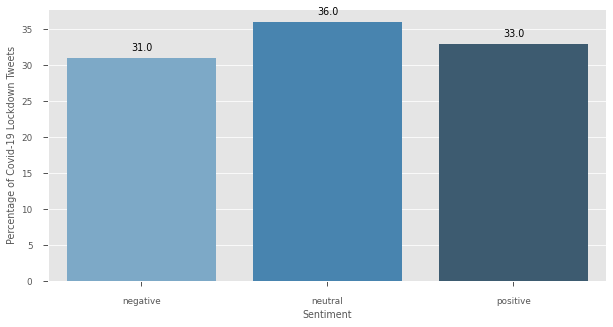

In [27]:
# Visualise percentage of posts with each sentiment

#### Plot settings ####
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot')
matplotlib.rcParams['font.family'] = "DejaVu Sans"
plt.rcParams['figure.figsize'] = [10, 5]
sns.set_context('paper')

ax = sns.barplot(x="sentiment_label",
                 y="percentage_of_total",
                 data=tweets_per_sentiment,
                 palette=("Blues_d")
                )

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.set(xlabel='Sentiment', ylabel='Percentage of Covid-19 Lockdown Tweets')

plt.savefig('../Twitter_Output/Twitter_May_Nov_SentimentChart.png', dpi=400, bbox_inches="tight")

In [28]:
# Word Cloud Function

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_word_cloud(dataframe, category):
    comment_words = ''
    processed_text = dataframe['processed_text']
    
    # iterate through list
    for tweet_text in processed_text:
        # split the text into tokens
        tokens = tweet_text.split()
        # Append tokens to string comment_words
        comment_words += " ".join(tokens)+" "

    # make a word cloud
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black', colormap='rainbow',
                    #stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the word cloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()
    wordcloud.to_file(f'../Twitter_Output/Twitter_May_Nov_Wordcloud_{category}.png')

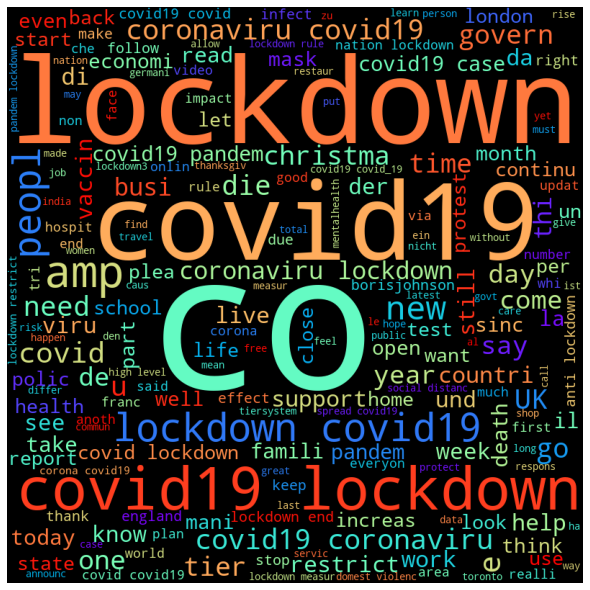

In [29]:
# All Sentiment Word Cloud

generate_word_cloud(tweets, 'all')

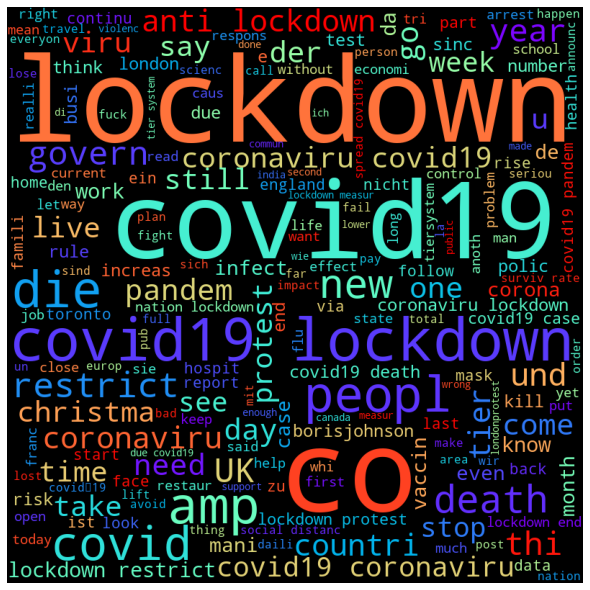

In [30]:
# Negative Sentiment DataFrame

negative = tweets[tweets['sentiment_label'] == 'negative']
generate_word_cloud(negative, 'negative')

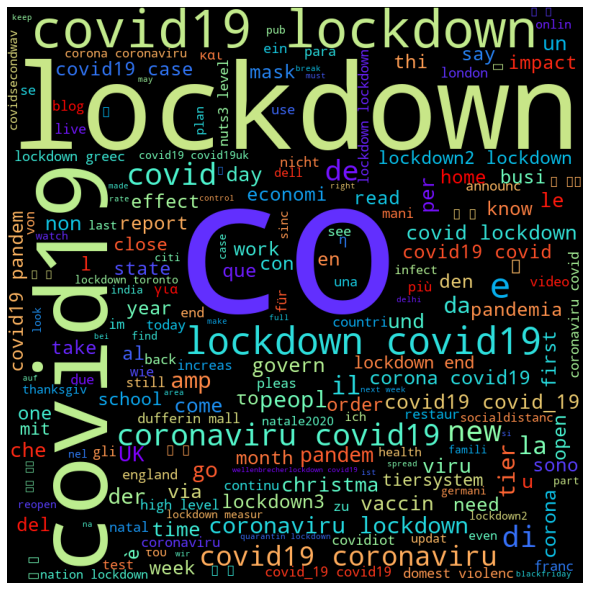

In [31]:
# Neutral Sentiment DataFrame

neutral = tweets[tweets['sentiment_label'] == 'neutral']
generate_word_cloud(neutral, 'neutral')

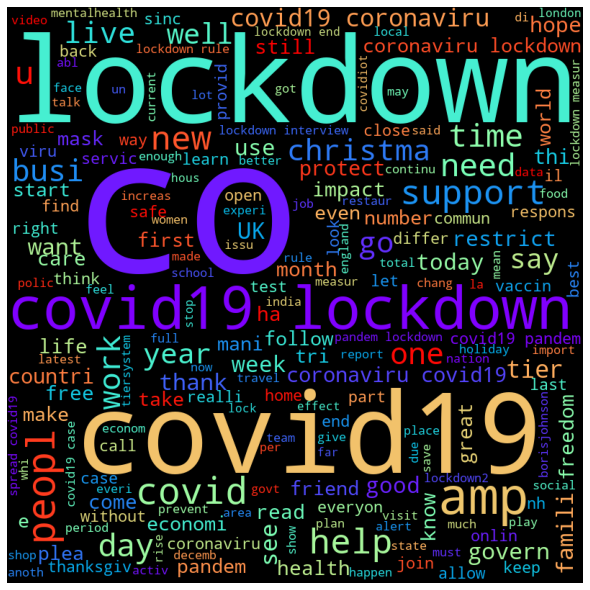

In [32]:
# Positive Sentiment DataFrame

positive = tweets[tweets['sentiment_label'] == 'positive']
generate_word_cloud(positive, 'positive')

In [33]:
# Export to a CSV

# path = "./Twitter_Sentiments/"
# if not os.path.exists(path):
#         os.makedirs(path)

tweets.to_csv('./Twitter_May_Nov_Sentiments.csv') 